In [ ]:
#Install  UMAP and MAGIC for comparison
!pip install umap-learn magic-impute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 12.6 MB/s 
     |████████████████████████████████| 93 kB 2.3 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 1.8 MB 31.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=462ea78cf84817b38764cc939a51f546a863a5c2c8114e9af985bc6991a18354
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=83658500415556f70e97f64a58a3c1096a04fafe8fa8675066784e0c7de81f5e
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns
import umap
import magic

In [ ]:
#Tasic B, Menon V, Nguyen TN, Kim TK, Jarsky T, et al. (2016) Adult mouse cortical cell taxonomy revealed by single cell transcriptomics. Nat Neurosci 19: 335-346. DOI: 10.1038/nn.4216
#https://singlecell.broadinstitute.org/single_cell/study/SCP6/a-transcriptomic-taxonomy-of-adult-mouse-visual-cortex-visp#study-summary


In [ ]:
#download the neuronal dataset
!pip install gdown
# to upgrade
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
import gdown
# same as the above, but with the file ID
id = "1RvQV_ieailND6psKjEnYewud6hcY_pMm"
gdown.download(id=id, output="expression_matrix.txt", quiet=False)

#https://drive.google.com/file/d/1RvQV_ieailND6psKjEnYewud6hcY_pMm/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1RvQV_ieailND6psKjEnYewud6hcY_pMm
To: /content/expression_matrix.txt
100%|██████████| 126M/126M [00:00<00:00, 145MB/s]


'expression_matrix.txt'

In [ ]:
# same as the above, but with the file ID
id = "1lJ4oorGhW-S8Q29mv6mqBizTo7cF0eAg"
gdown.download(id=id, output="clusters.txt", quiet=False)
#https://drive.google.com/file/d/1lJ4oorGhW-S8Q29mv6mqBizTo7cF0eAg/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1lJ4oorGhW-S8Q29mv6mqBizTo7cF0eAg
To: /content/clusters.txt
100%|██████████| 52.6k/52.6k [00:00<00:00, 46.0MB/s]


'clusters.txt'

In [ ]:
import pandas as pd
import numpy as np
import umap
#este funciona
data = pd.read_table('/content/expression_matrix.txt')
data = data.set_index('Unnamed: 0')
data = data.T
data



Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0.0,76.13,0.05,0.0,0.00,0.00,0.00,0.0,0.0,0.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1401.76,242.94,242.94
A01101402,0.0,512.73,10.11,0.0,0.00,146.61,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1397.16,539.54,539.54
A01101403,0.0,172.75,0.00,0.0,0.00,23.65,0.00,0.0,0.0,72.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332.88,341.45,341.45
A01101404,0.0,170.56,0.02,0.0,0.00,117.60,0.00,0.0,0.0,125.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1442.66,260.02,260.02
A01101405,0.0,113.87,0.04,0.0,0.00,180.93,0.00,0.0,0.0,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749.68,348.10,348.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z11041427,0.0,106.52,0.00,0.0,0.08,221.36,0.00,0.0,0.0,141.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1514.75,433.01,433.01
Z11041428,0.0,349.73,0.00,0.0,0.00,262.66,88.02,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.32,787.32,787.32
Z11041429,0.0,1.54,1.17,0.0,0.00,219.92,0.00,0.0,0.0,94.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1829.42,506.35,506.35
Z11041430,0.0,0.54,7.65,0.0,43.42,272.64,0.00,0.0,0.0,78.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.09,709.91,709.91


In [ ]:
clusters = pd.read_table('clusters.txt',skiprows=1)
clusters

,TYPE,group,group.1
0,A01101401,GABA_Vip,Vip_Mybpc1
1,A01101402,GABA_Vip,Vip_Parm1
2,A01101403,Gluta_L4,L4_Ctxn3
3,A01101404,GABA_Vip,Vip_Chat
4,A01101405,GABA_Vip,Vip_Parm1
...,...,...,...
1674,Z11041427,GABA_Vip,Vip_Chat
1675,Z11041428,GABA_Vip,Vip_Chat
1676,Z11041429,GABA_Vip,Vip_Chat
1677,Z11041430,GABA_Vip,Vip_Chat


In [ ]:
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls

clusters.txt  expression_matrix.txt  sample_data  sc_PHENIX.py


In [ ]:
clusters.group.unique()

array(['GABA_Vip', 'Gluta_L4', 'Gluta_L2_3', 'Gluta_L2', 'GABA_Pvalb',
       'GABA_Ndnf', 'Gluta_L5a', 'NonNeu_SMC', 'NonNeu_Astro', 'Gluta_L5',
       'NonNeu_Micro', 'NonNeu_Endo', 'GABA_Sst', 'Gluta_L6b',
       'GABA_Sncg', 'GABA_Igtp', 'NonNeu_Oligo', 'GABA_Smad3',
       'NonNeu_OPC', 'Gluta_L5b', 'Gluta_L6a'], dtype=object)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30, random_state=1)
pca_data= pca.fit_transform(data)
#### import umap
fit = umap.UMAP(n_neighbors=10,verbose= True,metric='cosine',min_dist=0.5,n_epochs=1500,negative_sample_rate=5,set_op_mix_ratio=0.8,learning_rate=0.1,local_connectivity=3,random_state=42)
%time u_no = fit.fit_transform(data)
u_noimp_umap = pd.DataFrame(u_no, columns=['UMAP1', 'UMAP2'])

UMAP(angular_rp_forest=True, learning_rate=0.1, local_connectivity=3, metric='cosine', min_dist=0.5, n_epochs=1500, n_neighbors=10, random_state=42, set_op_mix_ratio=0.8, verbose=True)
Mon Dec 19 03:36:53 2022 Construct fuzzy simplicial set
Mon Dec 19 03:38:04 2022 Finding Nearest Neighbors
Mon Dec 19 03:38:08 2022 Finished Nearest Neighbor Search
Mon Dec 19 03:38:12 2022 Construct embedding


Epochs completed:   0%|            0/1500 [00:00]

Mon Dec 19 03:38:25 2022 Finished embedding
CPU times: user 1min 27s, sys: 490 ms, total: 1min 28s
Wall time: 1min 32s


In [ ]:
import plotly.express as px
fig = px.scatter(u_noimp_umap, x="UMAP1", y="UMAP2",color = clusters['group'])
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
   
})
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
color_continuous_scale=[(0, "rgb(240, 239, 238)"),(0.0001, "black"),(0.001, "black"),(0.035, "yellow"),(0.5, "#CCFFCC"), (1, "green") ]

#NON IMPUTATION 

In [ ]:
import plotly.express as px
fig = px.scatter(u_noimp_umap, x="UMAP1", y="UMAP2",color = data['Flt1'],color_continuous_scale=color_continuous_scale)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'   
})
fig.update_traces(marker=dict(size=3))
fig.show()

#Imputation with MAGIC
Try this first **t = 15, n_pca = 30, knn = 15** and compared with sc-PHENIX in the orther section

Try local imputation with parameters
t = 3, n_pca = 30, knn = 3
this means due to the kernel of MAGIC and sc-PHENIX will gene expression will be shared by approx to 3 local knn. Take in mind that local imputation can be similar to non-imputation for GSEA analysis obtening few in information about biological insights.

**1. Cautions with MAGIC** few PCA dimensions can lead to a distord manifolds try 3 pca dimensions, same applies to sc-PHENIX, high dimensional space is distord in a very low dimensions, specially with linear aproaches such as PCA.

**2. Cautions with MAGIC** 
Also, too many PCA dimensions and you will encounter the curse of dimensionality try 500 PCA dimensions, distinct clusters will be too close to each other and this will be reflected in over-smoothing Flt1 expression will spread to other phenotypes different from non-neuronal cells for example Endo and SMC. 


sc-PHENIX is robust agains more values of PCA dimensions(see IMPUTATION WITH sc-PHENIX) and other parameters (t and knn)

In [ ]:
import magic
magic_operator = magic.MAGIC(t = 15, n_pca = 500, knn = 15, random_state=1)
imputated_magic =magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 1679 cells and 24057 genes.
  Calculating graph and diffusion operator...


/usr/local/lib/python3.8/dist-packages/magic/magic.py:425: UserWarning:

Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.



    Calculating PCA...
    Calculated PCA in 23.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.32 seconds.
    Calculating affinities...
    Calculated affinities in 2.25 seconds.
  Calculated graph and diffusion operator in 28.07 seconds.
  Running MAGIC with `solver='exact'` on 24057-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 5.98 seconds.
Calculated MAGIC in 34.29 seconds.


In [ ]:
import plotly.express as px
fig = px.scatter(u_noimp_umap, x="UMAP1", y="UMAP2",color = imputated_magic['Flt1'],color_continuous_scale=color_continuous_scale)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'   
})
fig.update_traces(marker=dict(size=3))
fig.show()

sc-PHENIX as MAGIC

#IMPUTATION WITH sc-PHENIX
**t = 15, n_pca(n_components) = 30, knn = 15**

In [ ]:
from sc_PHENIX import run_pca, run_umap, sc_PHENIX
pca_data= run_pca(data,n_components=500, random_state=1)

import umap
#umap parameters we reduced the 500 PCA dimensions to 50 umap dimensions
fit = umap.UMAP(n_components=50,n_neighbors=10,verbose= True,metric='cosine',random_state=42)
%time u_no_3 = fit.fit_transform(pca_data) #u_no_3 variable is the 50 umap dimenions coordinates for sc-PHENIX
#the default output from UMAP is a euclidean interpretable space, but can be changed.

process start Mon Dec 19 03:39:22 2022
UMAP(angular_rp_forest=True, metric='cosine', n_components=50, n_neighbors=10, random_state=42, verbose=True)
Mon Dec 19 03:39:42 2022 Construct fuzzy simplicial set
Mon Dec 19 03:39:44 2022 Finding Nearest Neighbors
Mon Dec 19 03:39:45 2022 Finished Nearest Neighbor Search
Mon Dec 19 03:39:45 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Dec 19 03:39:58 2022 Finished embedding
CPU times: user 16.3 s, sys: 240 ms, total: 16.5 s
Wall time: 16.3 s


In [ ]:
neuro_phenix = sc_PHENIX(data, u_no_3,t=15,metric='euclidean',knn=15,decay=500)
neuro_phenix

calculando distancias
(1679, 1679)
done distance matrix
knn
 knn done
 afinity matrix


/content/sc_PHENIX.py:80: RuntimeWarning:

overflow encountered in power



 afinity matrix done
imputation
done
done Mon Dec 19 03:40:05 2022


Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0.007174,111.781537,14.374138,0.096667,4.150968,79.164583,16.679537,0.0,0.0,52.985071,...,1.845740,0.0,0.0,0.0,1.595187,0.0,0.0,1435.882485,540.141008,540.141008
A01101402,0.005529,121.233867,12.864618,0.081787,3.992459,88.722509,17.949187,0.0,0.0,59.763353,...,1.528038,0.0,0.0,0.0,1.654353,0.0,0.0,1459.915448,538.009953,538.009953
A01101403,0.078988,83.585435,11.174378,0.000094,5.047967,79.919761,19.940391,0.0,0.0,66.142134,...,0.244001,0.0,0.0,0.0,0.029595,0.0,0.0,701.109882,418.953826,418.953826
A01101404,0.000985,155.937159,5.826581,0.013924,3.785379,118.933535,23.059323,0.0,0.0,78.574629,...,0.337086,0.0,0.0,0.0,1.002955,0.0,0.0,1540.437117,518.959559,518.959559
A01101405,0.007418,110.489307,14.575085,0.097062,4.161099,78.726248,16.456646,0.0,0.0,51.924391,...,1.886540,0.0,0.0,0.0,1.568684,0.0,0.0,1438.677953,539.212834,539.212834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z11041427,0.000494,160.118151,5.064973,0.007936,3.816106,121.825322,23.414276,0.0,0.0,79.283432,...,0.199939,0.0,0.0,0.0,0.964484,0.0,0.0,1528.156265,510.779568,510.779568
Z11041428,0.000671,138.401459,9.392409,0.026089,3.099329,102.737180,25.879370,0.0,0.0,66.819368,...,0.417119,0.0,0.0,0.0,0.618267,0.0,0.0,1395.267361,536.930142,536.930142
Z11041429,0.000571,158.901924,5.195101,0.008741,3.758098,121.395290,23.611253,0.0,0.0,80.072869,...,0.223845,0.0,0.0,0.0,0.916328,0.0,0.0,1545.319549,517.408328,517.408328
Z11041430,0.000543,159.616460,5.062540,0.008143,3.779295,121.970146,23.558836,0.0,0.0,80.385237,...,0.213746,0.0,0.0,0.0,0.922918,0.0,0.0,1547.195990,516.208661,516.208661


In [ ]:
import plotly.express as px
fig = px.scatter(u_noimp_umap, x="UMAP1", y="UMAP2",color = neuro_phenix['Flt1'],color_continuous_scale=color_continuous_scale)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'   
})
fig.update_traces(marker=dict(size=3))
fig.show()

##Visualization of the markovian matrix

This section can give an idea to the user how to handle parameters visually. Also we showed the differences about the markovian matrix obtained from MAGIC and sc-PHENIX, and the explication why diffusion on PCA(a.k.a. MAGIC) tends to over-smooth data more easily than diffusion on PCA-UMAP(sc-PHENIX)

In [ ]:
#just used this code for getting the exp markovian matrix
def sc_PHENIX_vis(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    from scipy.spatial.distance import pdist
    from scipy.spatial.distance import squareform
    import time
    print('calculando distancias')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)

    new_matrix =  np.linalg.matrix_power(diff_op, t)
    
    return new_matrix

    

In [ ]:
#you need to install s_gd2 https://github.com/jxz12/s_gd2
!pip install s_gd2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 5.3 MB/s 


In [ ]:
# we are making the embbeding with s_gd2
import s_gd2
from scipy.spatial.distance import pdist, squareform
def sgd(D, n_components=2, random_state=None, init=None,num_dimensions=None):
    """Metric MDS using stochastic gradient descent
    Parameters
    ----------
    D : array-like, shape=[n_samples, n_samples]
        pairwise distances
    n_components : int, optional (default: 2)
        number of dimensions in which to embed `D`
    random_state : int or None, optional (default: None)
        numpy random state
    init : array-like or None
        Initialization algorithm or state to use for MMDS
    Returns
    -------
    Y : array-like, embedded data [n_sample, ndim]
    """

    N = D.shape[0]
    D = squareform(D)
    # Metric MDS from s_gd2
    Y = s_gd2.mds_direct(N, D, init=init, random_seed=random_state,num_dimensions=num_dimensions)
    return Y

In [ ]:
#just visualization 
from matplotlib.colors import ListedColormap
target=pd.Series(clusters.group)
list_clust = list(np.arange(21))
lut = dict(zip(clusters.group.unique(), list_clust))
row_colors = target.map(lut)
all_label_1= ['GABA_Vip', 'Gluta_L4', 'Gluta_L2_3', 'Gluta_L2', 'GABA_Pvalb',
       'GABA_Ndnf', 'Gluta_L5a', 'NonNeu_SMC', 'NonNeu_Astro', 'Gluta_L5',
       'NonNeu_Micro', 'NonNeu_Endo', 'GABA_Sst', 'Gluta_L6b',
       'GABA_Sncg', 'GABA_Igtp', 'NonNeu_Oligo', 'GABA_Smad3',
       'NonNeu_OPC', 'Gluta_L5b', 'Gluta_L6a']
cmap = ListedColormap(['#FFFF91', '#0055FA', '#1C67F9', '#3E7FFE', '#F91D12',
       '#FFA900', '#6095FC', '#6FAB91', '#C3F2DE', '#0793F0',
       '#397159', '#0E472E', '#FFFF00', '#7FC3F1',
       '#E06A40', '#E9B22C', '#179860', '#FAF712',
       '#03F216', '#14DEFA', '#03F2EB'])

#Visualization of the exponantiatex markovian matrix with sc-PHENIX with **Diffusion on PCA**
Try different parameters with sc-PHENIX as MAGIC using only PCA as initialization 

We this parameters:

```python

from sc_PHENIX import run_pca, run_umap, sc_PHENIX
pca_data= run_pca(data,n_components=500, random_state=1)

import umap
#umap parameters we reduced the 500 PCA dimensions to 50 umap dimensions
fit = umap.UMAP(n_components=50,n_neighbors=10,verbose= True,metric='cosine',random_state=42)
%time u_no_3 = fit.fit_transform(pca_data) #u_no_3 variable is the 50 umap dimenions coordinates for sc-PHENIX
#the default output from UMAP is a euclidean interpretable space, but can be changed.

```
you will observe that  subclusters are separated easily (well defined local structure) and global structure is more defined than MAGIC(next section)

We this parameters:
```python
pca_data= run_pca(data,n_components=30, random_state=1)

exp_markovian_matrix_like_magic = sc_PHENIX_vis(data,pca_data,t=15,decay=500,metric='euclidean',knn=15)

```

Also, you will observe that  subclusters are separated easily (well defined local structure) and global structure is more defined than MAGIC(next section)



In [ ]:
#We need to run sc_PHENIX_vis for visualization in 2d MDS plot, u_no3 has de umap coordinates 
#data is non-imputated matrix

from sc_PHENIX import run_pca, run_umap, sc_PHENIX
pca_data= run_pca(data,n_components=30, random_state=1)

import umap
#umap parameters we reduced the 500 PCA dimensions to 50 umap dimensions
fit = umap.UMAP(n_components=50,n_neighbors=10,verbose= True,metric='cosine',random_state=42)
%time u_no_3 = fit.fit_transform(pca_data) #u_no_3 variable is the 50 umap dimenions coordinates for sc-PHENIX
#the default output from UMAP is a euclidean interpretable space, but can be changed.
exp_markovian_matrix = sc_PHENIX_vis(data,u_no_3,t=15,decay=500,metric='euclidean',knn=15)


process start Mon Dec 19 03:40:09 2022
UMAP(angular_rp_forest=True, metric='cosine', n_components=50, n_neighbors=10, random_state=42, verbose=True)
Mon Dec 19 03:40:17 2022 Construct fuzzy simplicial set
Mon Dec 19 03:40:21 2022 Finding Nearest Neighbors
Mon Dec 19 03:40:21 2022 Finished Nearest Neighbor Search
Mon Dec 19 03:40:21 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Dec 19 03:40:44 2022 Finished embedding
CPU times: user 18.8 s, sys: 387 ms, total: 19.2 s
Wall time: 26.9 s
calculando distancias
(1679, 1679)
done distance matrix
knn
 knn done
 afinity matrix


<ipython-input-21-0d9639178b67>:35: RuntimeWarning:

overflow encountered in power



 afinity matrix done


In [ ]:
#pca initialization ("pca_data_2d" variable)for the sgd function for the MDS embbeding 
pca_data_2d= run_pca(neuro_phenix,n_components=2, random_state=4000000)
distance_matrix_dist_nuero =pdist(exp_markovian_matrix)
distance_matrix_pca_diff_neuro = (squareform(distance_matrix_dist_nuero))
PCA_diff_2D_MSD_sdg_neu = sgd(distance_matrix_pca_diff_neuro,num_dimensions=2,random_state=10,init=pca_data_2d)
PCA_diff_2D_MSD_sdg_neu 

process start Mon Dec 19 03:40:47 2022


array([[ 0.01082648, -0.04512864],
       [ 0.03484947, -0.07184175],
       [ 0.0638585 , -0.03239311],
       ...,
       [ 0.04189183, -0.07093602],
       [ 0.04033116, -0.07049617],
       [ 0.03818594, -0.07360348]])

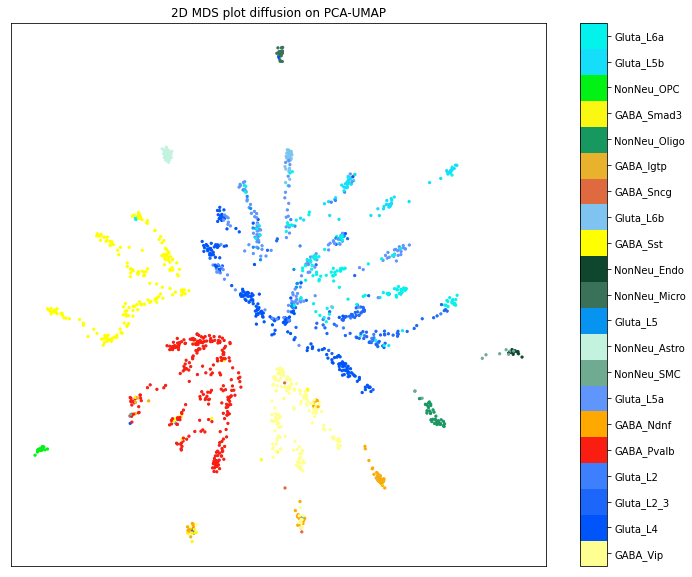

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(PCA_diff_2D_MSD_sdg_neu[:, 0], PCA_diff_2D_MSD_sdg_neu[:, 1], c=row_colors.astype('category'), cmap=cmap, s=5)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(22)-0.5)
cbar.set_ticks(np.arange(22))
cbar.set_ticklabels(all_label_1)
plt.title('2D MDS plot diffusion on PCA-UMAP');

In [ ]:
import plotly.express as px
fig = px.scatter(pd.DataFrame(PCA_diff_2D_MSD_sdg_neu,columns= ['MDS1','MDS2']), x="MDS1", y="MDS2",color = clusters['group'])
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
   
})
fig.update_traces(marker=dict(size=3))
fig.show()

#Visualization of the exponantiatex markovian matrix as MAGIC

**Diffusion on PCA**
Try different parameters with sc-PHENIX as MAGIC using only PCA as initialization 
We this parameters:

```python

pca_data= run_pca(data,n_components=30, random_state=1)

exp_markovian_matrix_like_magic = sc_PHENIX_vis(data,pca_data,t=15,decay=500,metric='euclidean',knn=15)

```
you will observe that gaba subclusters are not posible to visualize, indicating that gaba subclusters are grouped in a single dense cluster, at least visually.

We this parameters:
```python
pca_data= run_pca(data,n_components=500, random_state=1)

exp_markovian_matrix_like_magic = sc_PHENIX_vis(data,pca_data,t=15,decay=500,metric='euclidean',knn=15)

```

Several distinct clusters are grouped, this indicates that if you shared information with local neighbors in this distorted manifold you will obtain over-smoothing




In [ ]:
pca_data= run_pca(data,n_components=500, random_state=1)

exp_markovian_matrix_like_magic = sc_PHENIX_vis(data,pca_data,t=15,decay=500,metric='euclidean',knn=15)
#INSTED OF USING PCA-UMAP SPACE WE USED PCA SPACE FOR SC_PHENIX_vis to run as MAGIC

process start Mon Dec 19 03:41:03 2022
calculando distancias
(1679, 1679)
done distance matrix
knn
 knn done
 afinity matrix


<ipython-input-21-0d9639178b67>:35: RuntimeWarning:

overflow encountered in power



 afinity matrix done


In [ ]:
distance_matrix_dist_nuero =pdist(exp_markovian_matrix_like_magic)
distance_matrix_pca_diff_neuro = (squareform(distance_matrix_dist_nuero))
PCA_diff_2D_MSD_sdg_neu = sgd(distance_matrix_pca_diff_neuro,num_dimensions=2,random_state=5)
PCA_diff_2D_MSD_sdg_neu

array([[0.48309059, 0.45391914],
       [0.48545178, 0.46615382],
       [0.47647279, 0.54095968],
       ...,
       [0.48566798, 0.46287595],
       [0.48430741, 0.45884001],
       [0.48459923, 0.45703053]])

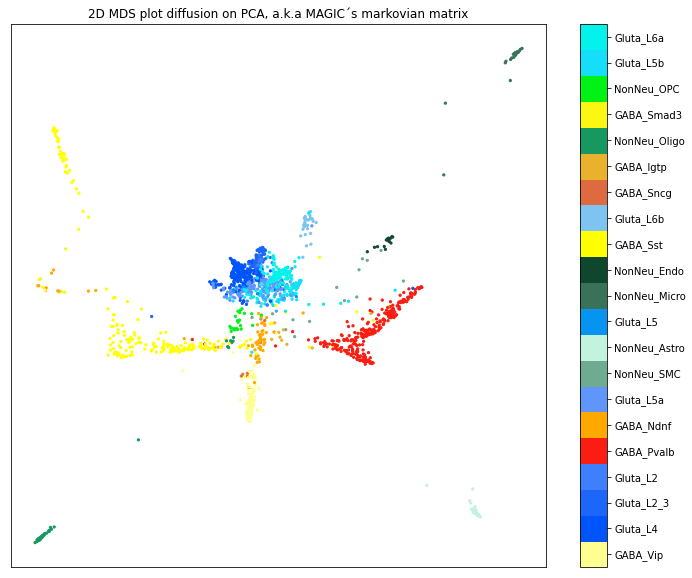

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(PCA_diff_2D_MSD_sdg_neu[:, 0], PCA_diff_2D_MSD_sdg_neu[:, 1], c=row_colors.astype('category'), cmap=cmap, s=5)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(22)-0.5)
cbar.set_ticks(np.arange(22))
cbar.set_ticklabels(all_label_1)
plt.title('2D MDS plot diffusion on PCA, a.k.a MAGIC'+'´'+'s markovian matrix');

In [ ]:
import plotly.express as px
fig = px.scatter(pd.DataFrame(PCA_diff_2D_MSD_sdg_neu,columns= ['MDS1','MDS2']), x="MDS1", y="MDS2",color = clusters['group'])
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
   
})
fig.update_traces(marker=dict(size=3))
fig.show()